In [415]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score


In [416]:
df = pd.read_csv('housePrice.csv')

In [417]:
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,PriceUSD
1838,140,3,True,True,True,Shahrake Gharb,11200000000,373333.33
2436,110,2,True,True,True,Ekhtiarieh,6500000000,216666.67
1318,58,1,True,True,True,Ekbatan,2850000000,95000.00
2870,55,3,True,True,True,Hashemi,1650000000,55000.00
620,92,2,False,True,True,Shahrake Qods,1012000000,33733.33


In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3479 non-null   object 
 1   Room       3479 non-null   int64  
 2   Parking    3479 non-null   bool   
 3   Warehouse  3479 non-null   bool   
 4   Elevator   3479 non-null   bool   
 5   Address    3456 non-null   object 
 6   Price      3479 non-null   int64  
 7   PriceUSD   3479 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(2)
memory usage: 146.2+ KB


In [419]:
df.describe(include='all')

,Area,Room,Parking,Warehouse,Elevator,Address,Price,PriceUSD
count,3479,3479.000000,3479,3479,3479,3456,3.479000e+03,3.479000e+03
unique,243,NaN,2,2,2,192,NaN,NaN
top,75,NaN,True,True,True,Punak,NaN,NaN
freq,111,NaN,2950,3182,2739,161,NaN,NaN
mean,NaN,2.079908,NaN,NaN,NaN,NaN,5.359023e+09,1.786341e+05
std,NaN,0.758275,NaN,NaN,NaN,NaN,8.099935e+09,2.699978e+05
min,NaN,0.000000,NaN,NaN,NaN,NaN,3.600000e+06,1.200000e+02
25%,NaN,2.000000,NaN,NaN,NaN,NaN,1.418250e+09,4.727500e+04
50%,NaN,2.000000,NaN,NaN,NaN,NaN,2.900000e+09,9.666667e+04
75%,NaN,2.000000,NaN,NaN,NaN,NaN,6.000000e+09,2.000000e+05


In [420]:
print(f" missing values  : {df.isnull().sum()} ")

 missing values  : 
Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price         0
PriceUSD      0
dtype: int64 


In [421]:
df.dropna(inplace=True)

In [422]:
df.drop('Price', axis=1, inplace=True)

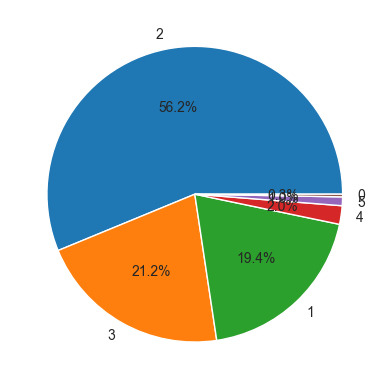

In [423]:
df['Room'] = df['Room'].astype('category')
category_counts = df["Room"].value_counts()
plt.pie(category_counts, autopct='%1.1f%%', labels=[2, 3, 1, 4, 5, 0])
plt.show()
df["Room"] = df["Room"].astype(int)

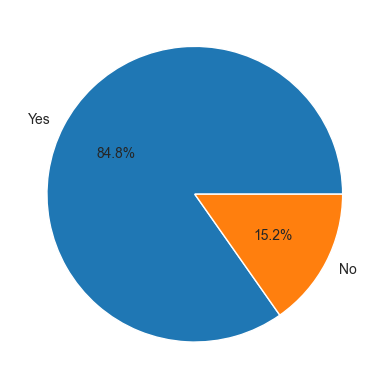

In [424]:
categories = ["True", "False"]
category_counts = df["Parking"].value_counts()
plt.pie(category_counts, autopct='%1.1f%%', labels=["Yes", "No"])
plt.show()

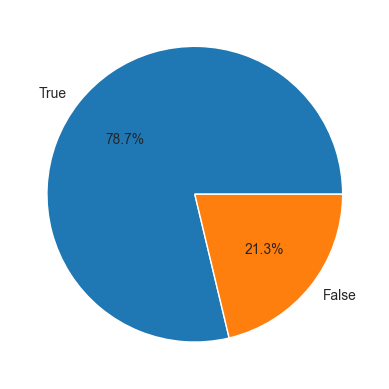

In [425]:
category_counts = df["Elevator"].value_counts()
plt.pie(category_counts, autopct='%1.1f%%', labels=['True', 'False'])
plt.show()

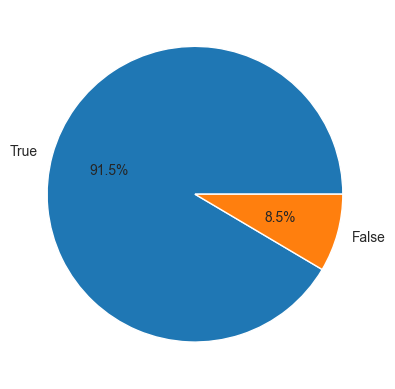

In [426]:
category_counts = df["Warehouse"].value_counts()
plt.pie(category_counts, autopct='%1.1f%%', labels=['True', 'False'])
plt.show()

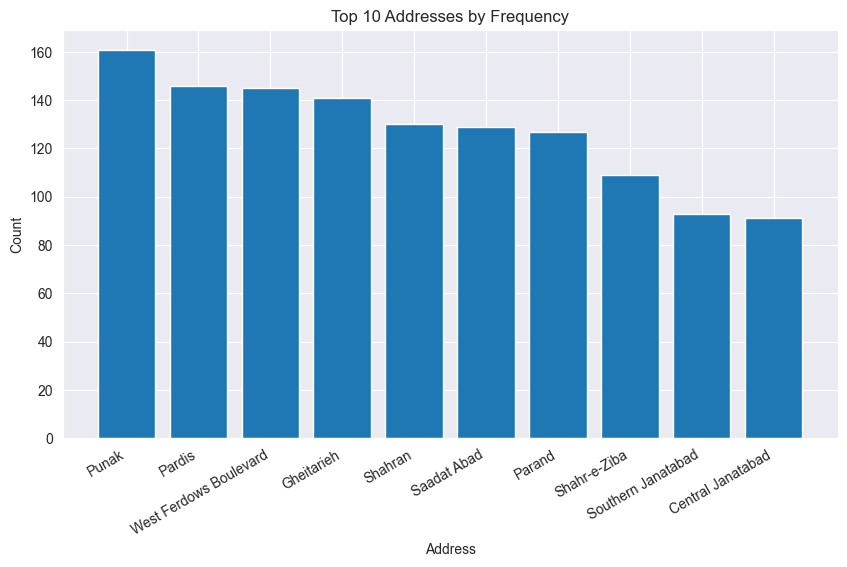

In [427]:
address_counts = df["Address"].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.bar(x=address_counts.index, height=address_counts.values)
plt.title("Top 10 Addresses by Frequency")
plt.xlabel("Address")
plt.ylabel("Count")
plt.gcf().autofmt_xdate()
plt.show()

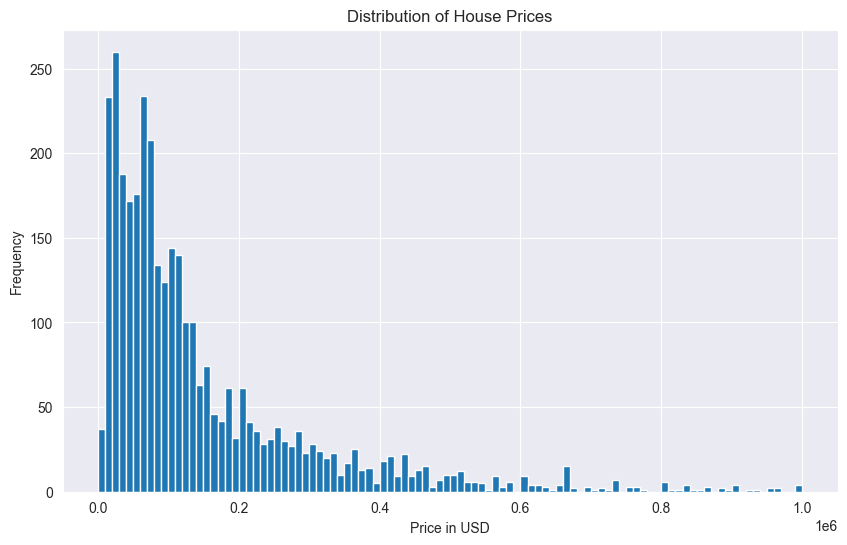

In [428]:

plt.figure(figsize=(10, 6))
plt.hist(df["PriceUSD"], bins=100, range=(0, 1_000_000), )
plt.title("Distribution of House Prices")
plt.xlabel("Price in USD")
plt.ylabel("Frequency")
plt.show()

In [430]:
df.Area = df.Area.str.replace(',', '').astype(np.uint64)
df.Area

0        63
1        60
2        79
3        95
4       123
       ... 
3474     86
3475     83
3476     75
3477    105
3478     82
Name: Area, Length: 3456, dtype: uint64

In [431]:
df.Area.describe()

count    3.456000e+03
mean     8.802191e+06
std      3.177783e+08
min      3.000000e+01
25%      6.900000e+01
50%      9.000000e+01
75%      1.210000e+02
max      1.616000e+10
Name: Area, dtype: float64

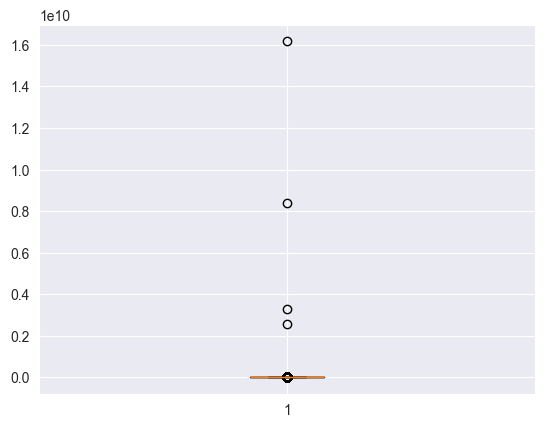

In [432]:
plt.boxplot(x=df["Area"])
plt.show()

In [433]:
print(f"before{df.shape}")
Q1 = df["Area"].quantile(0.25)
Q3 = df["Area"].quantile(0.75)
IQR = Q3 - Q1
dfCleaned = df[(df["Area"] >= (Q1 - 1.5 * IQR)) & (df["Area"] <= (Q3 + 1.5 * IQR))]
print(f"after{dfCleaned.shape}")

before(3456, 7)
after(3219, 7)


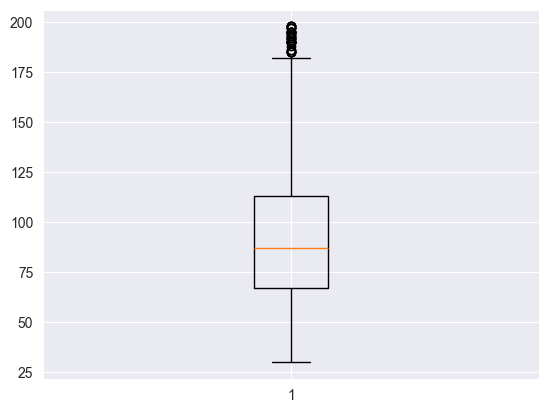

In [434]:
plt.boxplot(x=dfCleaned["Area"])
plt.show()

In [435]:
df.PriceUSD.describe()

count    3.456000e+03
mean     1.793319e+05
std      2.707243e+05
min      1.200000e+02
25%      4.733333e+04
50%      9.666667e+04
75%      2.000000e+05
max      3.080000e+06
Name: PriceUSD, dtype: float64

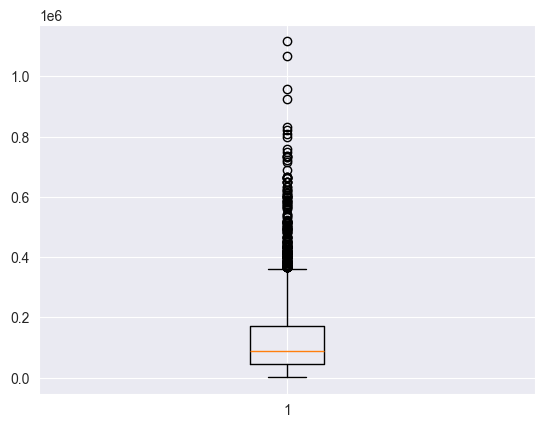

In [436]:
plt.boxplot(x=dfCleaned["PriceUSD"])
plt.show()

In [437]:
print(f"before{dfCleaned.shape}")
Q1 = dfCleaned["PriceUSD"].quantile(0.25)
Q3 = dfCleaned["PriceUSD"].quantile(0.75)
IQR = Q3 - Q1
dfCleaned = dfCleaned[(dfCleaned["PriceUSD"] >= (Q1 - 1.5 * IQR)) & (dfCleaned["PriceUSD"] <= (Q3 + 1.5 * IQR))]
print(f"after{dfCleaned.shape}")

before(3219, 7)
after(3000, 7)


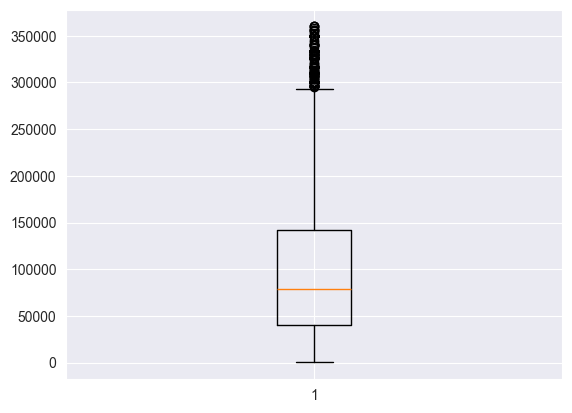

In [438]:
plt.boxplot(x=dfCleaned["PriceUSD"])
plt.show()

In [439]:
dfCleaned.replace({True: 1, False: 0}, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_22676\3367396168.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [440]:
dfCleaned["HasFacilities"] = dfCleaned["Parking"] + dfCleaned["Elevator"] + dfCleaned["Warehouse"]
dfCleaned["HasFacilities"] = dfCleaned["HasFacilities"].astype(int)


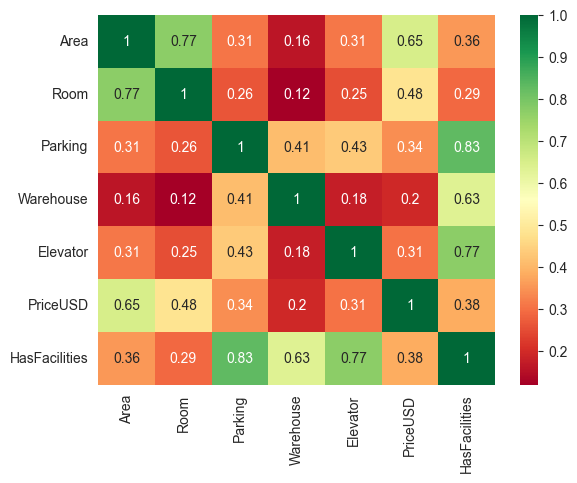

In [441]:
matrix = dfCleaned.corr(numeric_only=True)
sns.heatmap(matrix, annot=True, cmap='RdYlGn')
plt.show()

In [442]:
Lat_Long_Locations = {'Shahran': [35.77, 51.28], 'Qalandari': [35.7886, 51.4415], 'Lavasan': [35.8186, 51.6226],

                      'Pardis': [35.75, 51.77], 'Amir Bahador': [35.6711, 51.4034],

                      'Shahrake Qods': [35.76, 51.37], 'Ekhtiarieh': [35.7860, 51.4581],

                      'Shahrake Gharb': [35.76, 51.37], 'Ekbatan': [35.7091, 51.3026],

                      'North Program Organization': [35.73, 51.30], 'Absard': [35.6195, 52.1509],

                      'Andisheh': [35.75, 51.27], 'Haft Tir': [35.7161, 51.4254],

                      'West Ferdows Boulevard': [35.73, 51.29], 'Mahallati': [35.6757, 51.5143],

                      'Narmak': [35.73, 51.50], 'Ozgol': [35.7907, 51.5101],

                      'Zafar': [35.76, 51.42], 'Tajrish': [35.7995, 51.4300],

                      'Islamshahr': [35.54, 51.22], 'Dorous': [35.7730, 51.4550],

                      'Pirouzi': [35.69, 51.46], 'Abazar': [35.7326, 51.3256],

                      'Shahrake Shahid Bagheri': [35.76, 51.20], 'Koohsar': [35.7643, 51.2835],

                      'Moniriyeh': [35.68, 51.40], 'Parastar': [35.6816, 51.4834],

                      'Saadat Abad': [35.78, 51.373], 'Majidieh': [35.7350, 51.4626],

                      'Amirieh': [35.627, 51.029], 'Southern Chitgar': [35.7141, 51.1825],

                      'Southern Janatabad': [35.747, 51.300], 'Karimkhan': [35.7146, 51.4199],

                      'Salsabil': [35.685, 51.375], 'Si Metri Ji': [35.6785, 51.3518],

                      'Feiz Garden': [35.745, 51.323], 'Karoon': [35.6945, 51.3663],

                      'Water Organization': [35.713, 51.399], 'Northern Chitgar': [35.7237, 51.1863],

                      'ShahrAra': [35.718, 51.373], 'East Pars': [35.7409, 51.5467],

                      'Gisha': [35.734, 51.376], 'Kook': [35.7032, 51.4126],

                      'Ray': [35.570, 51.442], 'Air force': [35.7020, 51.4839],

                      'Abbasabad': [35.738, 51.436], 'Sohanak': [35.8008, 51.5325],

                      'Ostad Moein': [35.701, 51.344], 'Kamranieh': [35.7989, 51.4747],

                      'Farmanieh': [35.800, 51.467], 'Velenjak': [35.8052, 51.4021],

                      'Parand': [35.480, 50.937], 'Pasdaran': [35.7828, 51.4675],

                      'Punak': [35.759, 51.3385], 'Chardivari': [35.7546, 51.3642],

                      'Qasr-od-Dasht': [35.6898, 51.3699], 'Zargandeh': [35.7757, 51.4324],

                      'Aqdasieh': [35.797, 51.4865], 'Gholhak': [35.7727, 51.4438],

                      'Pakdasht': [35.4716, 51.6752], 'Heravi': [35.7676, 51.4759],

                      'Railway': [35.6618, 51.3979], 'Hashemi': [35.6893, 51.3595],

                      'Central Janatabad': [35.7578, 51.3016], 'Dehkade Olampic': [35.7604, 51.2634],

                      'East Ferdows Boulevard': [35.7230, 51.3199], 'Komeil': [35.7420, 51.5602],

                      'Pakdasht KhatunAbad': [35.4992, 51.6579], 'Zibadasht': [35.7491, 51.2596],

                      'Sattarkhan': [35.7146, 51.3643], 'Damavand': [35.6924, 52.0473],

                      'Baghestan': [35.6464, 51.1308], 'Republic': [35.6975, 51.3818],

                      'Shahryar': [35.6722, 51.0122], 'Zaferanieh': [35.8098, 51.4103],

                      'Northern Janatabad': [35.7728, 51.3059], 'Gheitarieh': [35.7929, 51.4447],

                      'Daryan No': [35.7140, 51.3580], 'Azadshahr': [35.7339, 51.1899],

                      'Southern Program Organization': [35.7259, 51.3017], 'Gandhi': [35.7526, 51.4115],

                      'Rudhen': [35.7313, 51.9011], 'Niavaran': [35.8166, 51.4702],

                      'West Pars': [35.7411, 51.5321], 'Amirabad': [35.7358, 51.3924],

                      'Afsarieh': [35.6539, 51.4928], 'Marzdaran': [35.7349, 51.3519],

                      'Sadeghieh': [35.7188, 51.3298], 'Elahieh': [35.7904, 51.4262],

                      'Chahardangeh': [35.6061, 51.3089], 'Baqershahr': [35.5339, 51.4039],

                      'Jeyhoon': [35.6896, 51.3635], 'Lavizan': [35.7748, 51.496],

                      'Shams Abad': [35.7487, 51.4717], 'Fatemi': [35.7197, 51.4033],

                      'Keshavarz Boulevard': [35.7094, 51.4004], 'Kahrizak': [35.5199, 51.3571],

                      'Qarchak': [35.4387, 51.5696], 'Northren Jamalzadeh': [35.7040, 51.3868],

                      'Azarbaijan': [35.6977, 51.3729], 'Bahar': [35.7094, 51.4301],

                      'Persian Gulf Martyrs Lake': [35.7433, 51.5944], 'Beryanak': [35.6768, 51.3764],

                      'Heshmatieh': [35.7214, 51.4577], 'Elm-o-Sanat': [35.7364, 51.5051],

                      'Golestan': [35.7699, 51.4641], 'Shahr-e-Ziba': [35.7478, 51.2902],

                      'Qazvin Imamzadeh Hassan': [35.7984, 50.9853], 'Valiasr': [35.6505, 51.3407],

                      'Mirdamad': [35.7610, 51.4264], 'Razi': [35.6666, 51.3957], 'Jordan': [35.7708, 51.4173],

                      'Shahedshahr': [35.5721, 51.0851], 'Yaftabad': [35.6651, 51.3184], 'Mehran': [35.7331, 51.3197],

                      'Nasim Shahr': [35.5640, 51.1608], 'Tenant': [35.5, 51.5], 'Chardangeh': [35.6055, 51.3083],

                      'Fallah': [35.6549, 51.3578], 'Eskandari': [35.6854, 51.3810],
                      'Shahrakeh Naft': [35.8088, 51.5109],

                      'Ajudaniye': [35.8073, 51.4843], 'Tehransar': [35.6972, 51.2561], 'Nawab': [35.6929, 51.3780],

                      'Yousef Abad': [35.7293, 51.4047], 'Northern Suhrawardi': [35.7335, 51.4392],

                      'Villa': [35.7081, 51.4151], 'Hakimiyeh': [35.7367, 51.5804], 'Nezamabad': [35.7186, 51.4667],

                      'Garden of Saba': [35.7196, 51.4392], 'Tarasht': [35.7064, 51.3459], 'Azari': [35.6673, 51.3518],

                      'Dezashib': [35.8097, 51.4530], 'Shahrake Apadana': [35.7061, 51.3273],
                      'Araj': [35.7909, 51.4881],

                      'Mahmoudieh': [35.7926, 51.4155], 'Vahidieh': [35.4850, 51.0828], 'Malard': [35.6656, 50.9772],

                      'Shahrake Azadi': [35.7097, 51.2743], 'Darband': [35.8240, 51.4254],
                      'Tehran Now': [35.7093, 51.4945],

                      'Darabad': [35.8171, 51.4906], 'Eram': [35.7255, 51.2921], 'Atabak': [35.6493, 51.4603],

                      'Sabalan': [35.7885, 51.4987], 'SabaShahr': [35.5813, 51.1116],
                      'Shahrake Madaen': [35.4773, 51.7188],

                      'Waterfall': [35.6788, 51.4425], 'Ahang': [35.6621, 51.4839], 'Salehabad': [35.5044, 51.1894],

                      'Pishva': [35.3054, 51.7147], 'Enghelab': [35.7012, 51.3937],
                      'Islamshahr Elahieh': [35.5722, 51.2409],

                      'Ray - Montazeri': [35.6054, 51.4306], 'Firoozkooh Kuhsar': [35.7590, 52.7684],
                      'Ghoba': [35.7612, 51.4494],

                      'Hekmat': [35.8007, 51.4421], 'Mehrabad': [35.6719, 51.3336],
                      'Southern Suhrawardi': [35.7202, 51.4340],

                      'Abuzar': [35.7318, 51.3260], 'Dolatabad': [35.6170, 51.4486], 'Hor Square': [35.6928, 51.3876],

                      'Taslihat': [35.7197, 51.4734], 'Kazemabad': [35.4462, 51.1625],

                      'Robat Karim': [35.4880, 51.0730], 'Ray - Pilgosh': [35.5929, 51.4392],
                      'Ghiyamdasht': [35.5246, 51.6492],

                      'Telecommunication': [35.7496, 51.2921], 'Mirza Shirazi': [35.7272, 51.4151],

                      'Seyed Khandan': [35.7401, 51.4479], 'Shahrake Quds': [35.7597, 51.3717],
                      'Safadasht': [35.6935, 50.8444],

                      'Khademabad Garden': [35.6557, 51.1146], 'Hassan Abad': [35.6864, 51.4097],

                      'Chidz': [35.7990, 51.4556], 'Khavaran': [35.6662, 51.4515], 'Argentina': [35.7361, 51.4143],

                      'Boloorsazi': [35.3747, 51.6006], 'Mehrabad River River': [35.6250, 51.2849],

                      'Varamin - Beheshti': [35.3222, 51.6440], 'Shoosh': [35.6406, 51.4440],
                      'Vanak': [35.7571, 51.4114],

                      'Thirteen November': [35.6366, 51.2112], 'Darakeh': [35.8074, 51.3813],
                      'Aliabad South': [35.6272, 51.4206],

                      'Alborz Complex': [35.7596, 51.2350], 'Firoozkooh': [35.7589, 52.7678],
                      'Vahidiyeh': [35.7152, 51.4702],

                      'Shadabad': [35.6578, 51.3036], 'Naziabad': [35.6406, 51.4031], 'Javadiyeh': [35.6543, 51.3898],

                      'Yakhchiabad': [35.6259, 51.4022]}

addresses = []
latitudes = []
longitudes = []

for address, coords in Lat_Long_Locations.items():
    addresses.append(address)
    latitudes.append(coords[0])
    longitudes.append(coords[1])

lat_long_locations = pd.DataFrame({
    'Address': addresses,
    'Latitude': latitudes,
    'Longitude': longitudes
})

lat_long_locations.head()



,Address,Latitude,Longitude
0,Shahran,35.7700,51.2800
1,Qalandari,35.7886,51.4415
2,Lavasan,35.8186,51.6226
3,Pardis,35.7500,51.7700
4,Amir Bahador,35.6711,51.4034


In [443]:
dfCleaned = pd.merge(left=lat_long_locations, right=dfCleaned, on='Address', how='right')
dfCleaned.head()

,Address,Latitude,Longitude,Area,Room,Parking,Warehouse,Elevator,PriceUSD,HasFacilities
0,Shahran,35.77,51.28,63,1,1,1,1,61666.67,3
1,Shahran,35.77,51.28,60,1,1,1,1,61666.67,3
2,Pardis,35.75,51.77,79,2,1,1,1,18333.33,3
3,Shahrake Qods,35.76,51.37,95,2,1,1,1,30083.33,3
4,Shahrake Gharb,35.76,51.37,123,2,1,1,1,233333.33,3


<Axes: >

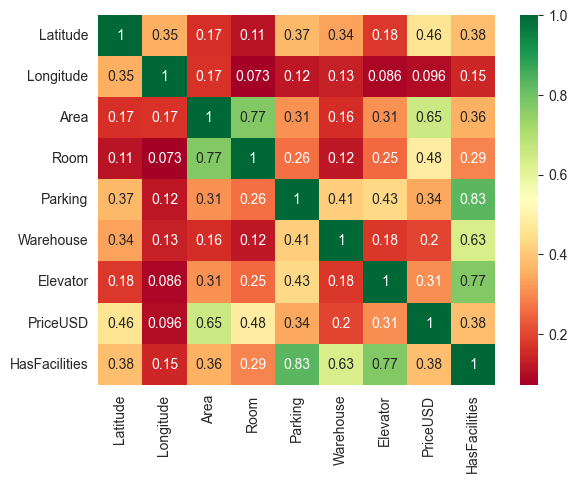

In [444]:
matrix = dfCleaned.corr(numeric_only=True)
sns.heatmap(matrix, annot=True, cmap='RdYlGn')

In [445]:

fig = px.scatter_mapbox(dfCleaned, lat='Latitude', lon='Longitude', color='PriceUSD', size='Room',
                        hover_data=['Area', 'HasFacilities', 'Address'])
fig.update_layout(mapbox_style='open-street-map')
fig.show()

In [446]:

X = dfCleaned.drop(columns=["PriceUSD", "Address", "Elevator", "Parking", "Warehouse"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = dfCleaned["PriceUSD"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [447]:

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, max_depth=10, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel="rbf"),

}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results.append({"Model": name, "R2": r2, "MAE": mae, "MSE": mse, "RMSE": rmse})

df_results = pd.DataFrame(results).sort_values(by="R2", ascending=False)
df_results




,Model,R2,MAE,MSE,RMSE
2,Random Forest,0.815686,19573.441804,1.118006e+09,33436.591491
3,Gradient Boosting,0.777178,20168.239770,1.351581e+09,36763.854957
4,KNN,0.768937,22186.608510,1.401571e+09,37437.565881
1,Decision Tree,0.717471,23345.918711,1.713753e+09,41397.496243
0,Linear Regression,0.495257,39260.558667,3.061649e+09,55332.171008
5,SVR,-0.057807,57525.218650,6.416399e+09,80102.429018


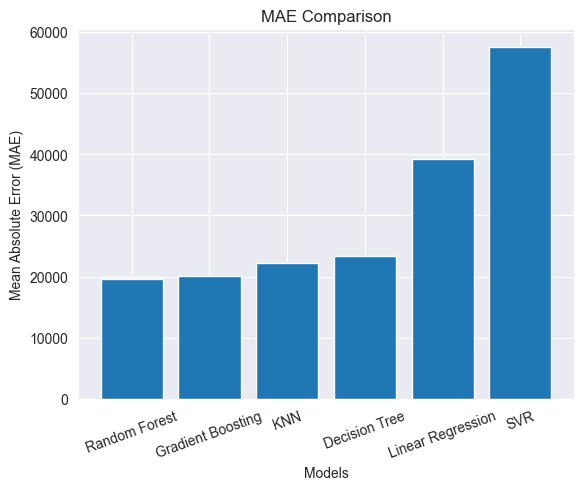

In [448]:
plt.bar(df_results.Model,df_results.MAE)
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("MAE Comparison",)
plt.xticks(rotation=20)
plt.show()


MAE: 19135.26
MSE: 1100784736.27
R²: 0.82
MAPE: 31.51
Cross Validation R² Scores: [0.80138672 0.81162359 0.78987328 0.81404235 0.83083915]


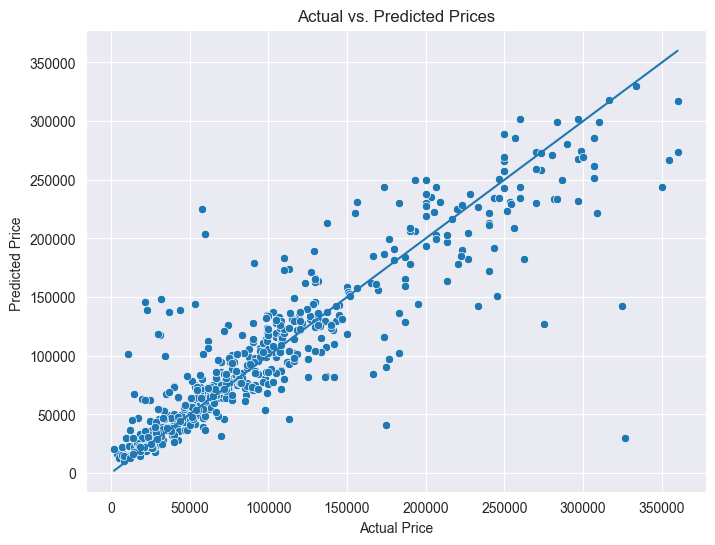

In [449]:

param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
rf = grid_search.best_estimator_

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse= rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")
print(f"MAPE: {mape:.2f}")

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print(f"Cross Validation R² Scores: {cv_scores}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price ")
plt.title("Actual vs. Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.show()


In [450]:
baseline_mae = mean_absolute_error(y_test, [y_test.mean()] * len(y_test))
print(f"Baseline MAE: {baseline_mae:.2f}, Model MAE: {mae:.2f}")


Baseline MAE: 59990.99, Model MAE: 19135.26


In [451]:
print(f"RMSE: {rmse:.2f}, Mean Target Value: {y_test.mean():.2f}")


RMSE: 33178.08, Mean Target Value: 99210.42


In [452]:
print(f"MSE: {mse:.2f}, Variance of y_test: {np.var(y_test):.2f}")


MSE: 1100784736.27, Variance of y_test: 6065756061.22


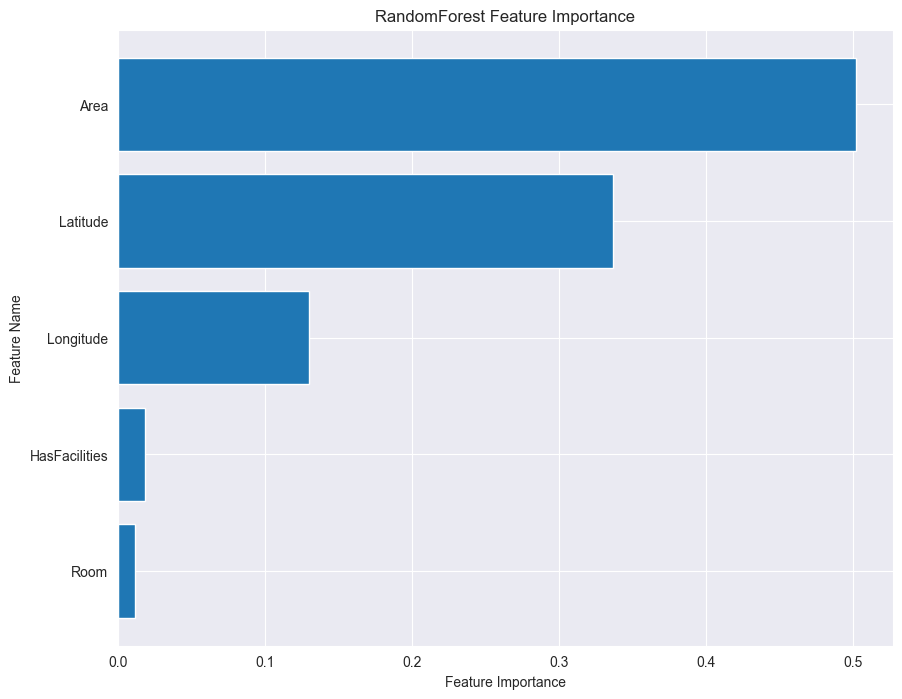

In [453]:

feature_importances = rf.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 8))
plt.barh(np.array(feature_names)[sorted_idx], feature_importances[sorted_idx],)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("RandomForest Feature Importance")
plt.show()

In [455]:


gb_model = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=42)

bagging_gb = BaggingRegressor(
    gb_model,
    n_estimators=200,
    max_samples=0.7,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

bagging_gb.fit(X_train, y_train)
y_pred = bagging_gb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")
print(f"MSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 18133.55
MSE: 980100277.19
R²: 0.8384
MSE: 31306.55
MAPE: 30.37%


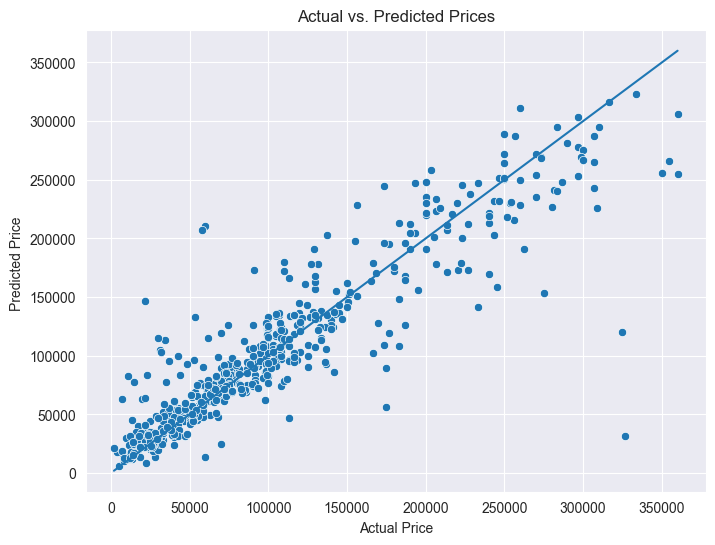

In [459]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price ")
plt.title("Actual vs. Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.show()